# KNN on Customer Dataset 


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="#1">KNN Theory</a></li>
        <li><a href="#2">KNN Algorithm</a></li>
        <li><a href="#3">Calculating the distance</a></li>
        <li><a href="#4">Dataset</a></li>
        <li><a href="#5">Label-encoding using Scikit learn library</a></li>
        <li><a href="#6">Data Visualization and Analysis</a></li>
        <li><a href="#7">Train Test Split</a></li>
        <li><a href="#8">Claasification</a></li>
        <li><a href="#12">What about other K</a></li>
        <li><a href="#13">Plot model accuracy for different number of neighbors</a></li>
    </ol>
</div>
<br>
<hr>

<div id="1">
    <h2>KNN Theory</h2>
</div>

K-Nearest Neighbors is an algorithm for supervised learning. Where the data is trained with data points corresponding to their classification. Once a point is to be predicted, it takes account the K nearest points to it to determines it's classification 


<div id="2">
    <h2>KNN Algorithm</h2>
</div>

1. Pick a value of K

2. Calculate the distance of unknown case from all the cases(Euclidian, Manhattan, Minkowski or Weighted)

3. Select the K-observations in the training data that are nearest to the unknown data point 

4. Predict the response of the unknown data point using the most popular response value from the K-Nearest Neighbors

### Here's an visualization of the K-Nearest Neighbors algorithm.


<img src="https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2019/03/How-does-KNN-Algorithm-work-KNN-Algorithm-In-R-Edureka-528x250.png">


Here we have two data points of Class A and B. We want to predtict what the red circle (test data point) is. If we consider a k value of 3. We will obtain a predtiction of Class A. Yet if we consider a k value of 6, we will obtain a prediction of Class B. 

Looking at from this perspective we can say that it is important to consider the value of K. In this diagram it considers the K Nearest Neighbors when it predicts the classification of the test point (Red Circle).

<div id="3">
    <h2>Calculating the distance</h2>
</div>

To calculate the distance between two points with one point being the unknown case and the other being the data you have in your dataset. To calculate there are several ways, we are gonna use euclidean distance. 

### Euclidean distance formule

<img src="https://i.stack.imgur.com/RtnTY.jpg">

let's consider you have 6 columns and 5 rows. The last column is the prediction columns have different Class labels.

Step 1. 

**Subtraction**

Subtract each attribute(column) from row 1 with the attribute from row 2.

Example = (2-3) = -1

Step 2.

**Exponention**

After the subtracting column 1 from row 1, with column 1 from row 2, we will get squared root. 

**Important**
Results are always positive 

Example = (2-3)** 2 = (-1)** 2 = 1

Step 3.

**Sum**

Once you are done performing step 1 and 2 on all the attribute(column) from row 1 with the attribute from row 2. Sum all the results.

Example = (2-3)** 2 + (2-3)** 2 + (4-5)** 2 + (5-6)** 2 + (2-3)** 2 = 5


Step 4.

**Square root**

After step 3, we will square root the result and that the euclidean distance from line 1 to line 2.

Perform the same steps with respect to other lines and you will have the euclidean distance from line 1 to all other lines. Once that is done. We will check which is the class that most appears. The class which appears more time will be the class that we will use to classify the unknown case. 

### Import Libraries

In [102]:
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
import seaborn as sns
%matplotlib inline 

<div id="4">
    <h2>Dataset</h2>
</div>


Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorizing the customers into four groups. If demographic data can be used to predict group membership, the company can customize offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case. 

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns. 

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
  1- Basic Service
  2- E-Service
  3- Plus Service
  4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

You can find this dataset in IBM SPSS.


### Load the dataset

In [14]:
df = pd.read_excel("telco2.xlsx")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,confer,ebill,loglong,logtoll,logequi,logcard,logwire,lninc,custcat,churn
0,Zone 2,13,44,Married,9,64,College degree,5,No,Male,...,No,No,1.31,NaN,NaN,2.01,NaN,4.16,Basic service,Yes
1,Zone 3,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,...,Yes,No,1.48,3.03,NaN,2.72,3.58,4.91,Total service,Yes
2,Zone 3,68,52,Married,24,116,Did not complete high school,29,No,Female,...,Yes,No,2.90,2.89,NaN,3.41,NaN,4.75,Plus service,No
3,Zone 2,33,33,Unmarried,12,33,High school degree,0,No,Female,...,No,No,2.25,NaN,NaN,NaN,NaN,3.50,Basic service,Yes
4,Zone 2,23,30,Married,9,30,Did not complete high school,2,No,Male,...,Yes,No,1.84,NaN,NaN,NaN,NaN,3.40,Plus service,No


In [113]:
#making a copy of the dataset
df1 = df.copy()

### Data Exploration

In [114]:
df1.shape

(1000, 42)

In [115]:
#Checking for any missing values 
df1.isna().sum()

region        0
tenure        0
age           0
marital       0
address       0
income        0
ed            0
employ        0
retire        0
gender        0
reside        0
tollfree      0
equip         0
callcard      0
wireless      0
longmon       0
tollmon       0
equipmon      0
cardmon       0
wiremon       0
longten       0
tollten       0
equipten      0
cardten       0
wireten       0
multline      0
voice         0
pager         0
internet      0
callid        0
callwait      0
forward       0
confer        0
ebill         0
loglong       0
logtoll     525
logequi     614
logcard     322
logwire     704
lninc         0
custcat       0
churn         0
dtype: int64

We can see that the column logtoll, logequi, logcard and logwire are having missing values. As we are not gonna be using these columns for over analysis we will drop them.

In [116]:
df1 = df1.drop(["loglong","logtoll","logequi","logcard","logwire"],axis =1)
df1.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,pager,internet,callid,callwait,forward,confer,ebill,lninc,custcat,churn
0,Zone 2,13,44,Married,9,64,College degree,5,No,Male,...,No,No,No,No,Yes,No,No,4.16,Basic service,Yes
1,Zone 3,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,...,Yes,No,Yes,Yes,Yes,Yes,No,4.91,Total service,Yes
2,Zone 3,68,52,Married,24,116,Did not complete high school,29,No,Female,...,No,No,Yes,Yes,No,Yes,No,4.75,Plus service,No
3,Zone 2,33,33,Unmarried,12,33,High school degree,0,No,Female,...,No,No,No,No,No,No,No,3.50,Basic service,Yes
4,Zone 2,23,30,Married,9,30,Did not complete high school,2,No,Male,...,No,No,Yes,No,Yes,Yes,No,3.40,Plus service,No


In [117]:
df1.isna().values.sum()

0

There are no missing values 

In [118]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1000 non-null   object 
 1   tenure    1000 non-null   int64  
 2   age       1000 non-null   int64  
 3   marital   1000 non-null   object 
 4   address   1000 non-null   int64  
 5   income    1000 non-null   int64  
 6   ed        1000 non-null   object 
 7   employ    1000 non-null   int64  
 8   retire    1000 non-null   object 
 9   gender    1000 non-null   object 
 10  reside    1000 non-null   int64  
 11  tollfree  1000 non-null   object 
 12  equip     1000 non-null   object 
 13  callcard  1000 non-null   object 
 14  wireless  1000 non-null   object 
 15  longmon   1000 non-null   float64
 16  tollmon   1000 non-null   float64
 17  equipmon  1000 non-null   float64
 18  cardmon   1000 non-null   float64
 19  wiremon   1000 non-null   float64
 20  longten   1000 non-null   float

In [119]:
df1.describe(include="all")

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,pager,internet,callid,callwait,forward,confer,ebill,lninc,custcat,churn
count,1000,1000.000000,1000.000000,1000,1000.000000,1000.000000,1000,1000.000000,1000,1000,...,1000,1000,1000,1000,1000,1000,1000,1000.000000,1000,1000
unique,3,NaN,NaN,2,NaN,NaN,5,NaN,2,2,...,2,2,2,2,2,2,2,NaN,4,2
top,Zone 3,NaN,NaN,Unmarried,NaN,NaN,High school degree,NaN,No,Female,...,No,No,No,No,No,Yes,No,NaN,Plus service,No
freq,344,NaN,NaN,505,NaN,NaN,287,NaN,953,517,...,739,632,519,515,507,502,629,NaN,281,726
mean,NaN,35.526000,41.684000,NaN,11.551000,77.535000,NaN,10.987000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.957000,NaN,NaN
std,NaN,21.359812,12.558816,NaN,10.086681,107.044165,NaN,10.082087,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.803548,NaN,NaN
min,NaN,1.000000,18.000000,NaN,0.000000,9.000000,NaN,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.200000,NaN,NaN
25%,NaN,17.000000,32.000000,NaN,3.000000,29.000000,NaN,3.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.370000,NaN,NaN
50%,NaN,34.000000,40.000000,NaN,9.000000,47.000000,NaN,8.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.850000,NaN,NaN
75%,NaN,54.000000,51.000000,NaN,18.000000,83.000000,NaN,17.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.420000,NaN,NaN


In [120]:
df1.fillna(0)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,...,pager,internet,callid,callwait,forward,confer,ebill,lninc,custcat,churn
0,Zone 2,13,44,Married,9,64,College degree,5,No,Male,...,No,No,No,No,Yes,No,No,4.16,Basic service,Yes
1,Zone 3,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,...,Yes,No,Yes,Yes,Yes,Yes,No,4.91,Total service,Yes
2,Zone 3,68,52,Married,24,116,Did not complete high school,29,No,Female,...,No,No,Yes,Yes,No,Yes,No,4.75,Plus service,No
3,Zone 2,33,33,Unmarried,12,33,High school degree,0,No,Female,...,No,No,No,No,No,No,No,3.50,Basic service,Yes
4,Zone 2,23,30,Married,9,30,Did not complete high school,2,No,Male,...,No,No,Yes,No,Yes,Yes,No,3.40,Plus service,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Zone 3,10,39,Unmarried,0,27,Some college,0,No,Female,...,No,No,No,No,No,No,Yes,3.30,Basic service,No
996,Zone 1,7,34,Unmarried,2,22,Post-undergraduate degree,5,No,Female,...,No,No,No,No,No,No,No,3.09,Basic service,No
997,Zone 3,67,59,Unmarried,40,944,Post-undergraduate degree,33,No,Female,...,Yes,Yes,Yes,Yes,Yes,Yes,Yes,6.85,Total service,No
998,Zone 3,70,49,Unmarried,18,87,High school degree,22,No,Female,...,No,No,Yes,Yes,Yes,Yes,No,4.47,Plus service,No


In [121]:
df1.isna().values.sum()

0

For our analysis we will take the columns tenure, age, marital, address, income, ed, employ, retire, gender, reside and custcat

In [122]:
df1 = df1.drop(["tollfree","equip","callcard","wireless","longmon","tollmon","equipmon","cardmon","wiremon","longten","tollten","equipten","cardten","wireten","multline","voice","pager","internet","callid","callwait","forward","confer","ebill","lninc","churn"],axis=1)

In [123]:
df1.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,Zone 2,13,44,Married,9,64,College degree,5,No,Male,2,Basic service
1,Zone 3,11,33,Married,7,136,Post-undergraduate degree,5,No,Male,6,Total service
2,Zone 3,68,52,Married,24,116,Did not complete high school,29,No,Female,2,Plus service
3,Zone 2,33,33,Unmarried,12,33,High school degree,0,No,Female,1,Basic service
4,Zone 2,23,30,Married,9,30,Did not complete high school,2,No,Male,4,Plus service


<div id="5">
    <h2>Label-encoding using Scikit learn library </h2>
</div>

In [124]:
#Import label encoder

from sklearn import preprocessing 

#laabel_encoder object knows how to understand word labels

label_encoder = preprocessing.LabelEncoder()

#Encode labels in column region, marital, ed, retire, gender, custcat

df1['region'] = label_encoder.fit_transform(df1['region'])
df1['marital'] = label_encoder.fit_transform(df1['marital'])
df1['ed'] = label_encoder.fit_transform(df1['ed'])
df1['retire'] = label_encoder.fit_transform(df1['retire'])
df1['gender'] = label_encoder.fit_transform(df1['gender'])
df1['custcat'] = label_encoder.fit_transform(df1['custcat'])

In [125]:
df1.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,1,13,44,0,9,64,0,5,0,1,2,0
1,2,11,33,0,7,136,3,5,0,1,6,3
2,2,68,52,0,24,116,1,29,0,0,2,2
3,1,33,33,1,12,33,2,0,0,0,1,0
4,1,23,30,0,9,30,1,2,0,1,4,2


Now that we have the proper data. We can do Data visualization and Analysis on it.

<div id="6">
    <h2>Data Visualization and Analysis</h2>
</div>

Let's see how many of each class is in our dataset 

In [126]:
df1["custcat"].value_counts()

2    281
0    266
3    236
1    217
Name: custcat, dtype: int64

0. **Basic-service = 266**

1. **E-Service Customer = 217**

2. **Plus Service = 281**

3. **Total Service = 236**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9ca13d51c0>]],
      dtype=object)

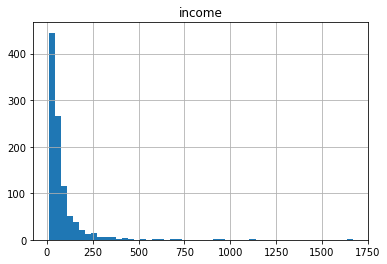

In [127]:
df1.hist(column ='income',bins=50)

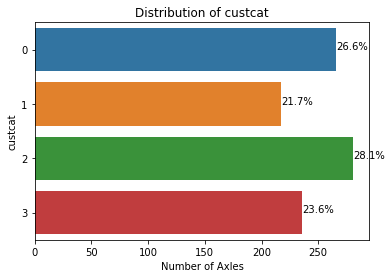

In [128]:
ax = sns.countplot(y=df1['custcat'], data=df1)
plt.title('Distribution of custcat')
plt.xlabel('Number of Axles')

total = len(df1['custcat'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))
plt.show()

0. **Basic-service = 266**

1. **E-Service Customer = 217**

2. **Plus Service = 281**

3. **Total Service = 236**

We can see from the countplot the Plus Service is been used more then other services.

## Feature set

In [129]:
df1.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [130]:
X = df1[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  1,  13,  44,   0,   9,  64,   0,   5,   0,   1,   2],
       [  2,  11,  33,   0,   7, 136,   3,   5,   0,   1,   6],
       [  2,  68,  52,   0,  24, 116,   1,  29,   0,   0,   2],
       [  1,  33,  33,   1,  12,  33,   2,   0,   0,   0,   1],
       [  1,  23,  30,   0,   9,  30,   1,   2,   0,   1,   4]])

In [133]:
y = df['custcat'].values
y[0:5]

array(['Basic service', 'Total service', 'Plus service', 'Basic service',
       'Plus service'], dtype=object)

## Normalize Data

Data Standardization give data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on distance of cases:

In [135]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456, -1.0100505 , -0.25303431,
        -0.12650641, -1.27915075, -0.5941226 , -0.22207644,  1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243, -1.0100505 , -0.4514148 ,
         0.54644972,  0.8386485 , -0.5941226 , -0.22207644,  1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601, -1.0100505 ,  1.23481934,
         0.35951747, -0.57321766,  1.78752803, -0.22207644, -0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243,  0.9900495 ,  0.04453642,
        -0.41625141,  0.13271542, -1.09029981, -0.22207644, -0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797, -1.0100505 , -0.25303431,
        -0.44429125, -0.57321766, -0.89182893, -0.22207644,  1.03459817,
         1.16300577]])

<div id = "7">
    <h2>Train Test Split</h2>
</div>

Out of Sample Accuracy is the percentage of correct predictions that the model makes on data that that the model has NOT been trained on. Doing a train and test on the same dataset will most likely have low out-of-sample accuracy, due to the likelihood of being over-fit.

It is important that our models have a high, out-of-sample accuracy, because the purpose of any model, of course, is to make correct predictions on unknown data. So how can we improve out-of-sample accuracy? One way is to use an evaluation approach called Train/Test Split.
Train/Test Split involves splitting the dataset into training and testing sets respectively, which are mutually exclusive. After which, you train with the training set and test with the testing set. 

This will provide a more accurate evaluation on out-of-sample accuracy because the testing dataset is not part of the dataset that have been used to train the data. It is more realistic for real world problems.

In [136]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =4)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


<div id="8">
    <h2> Claasification </h2>
    </div>
    
K-Nearest neighbor (KNN)

In [137]:
#import library 
from sklearn.neighbors import KNeighborsClassifier

<div id="9">
    <h2>Training </h2>
    </div>

In [175]:
#Let's start the algorithm with k = 5 and keep on updating to see which one is close 

k = 9
#Train model and Predict 
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=9)

<div id="10">
    <h2> Predicting</h2>
    </div>

In [164]:
yhat = neigh.predict(X_test)
yhat[0:5]

array(['Plus service', 'Basic service', 'Plus service', 'Total service',
       'Basic service'], dtype=object)

<div id="11">
    <h2> Accuracy evaluation </h2>
    </div>

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.

In [174]:
from  sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test,yhat))

Train set Accuracy:  0.46375
Test set Accuracy:  0.32


<div id="12">
    <h2> What about other K</h2>
    </div>

K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the User. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then chose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different Ks.


In [173]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.305, 0.28 , 0.305, 0.305, 0.28 , 0.27 , 0.265, 0.27 , 0.32 ])

<div id="13">
    <h2> Plot model accuracy for different number of neighbors </h2>
    </div>

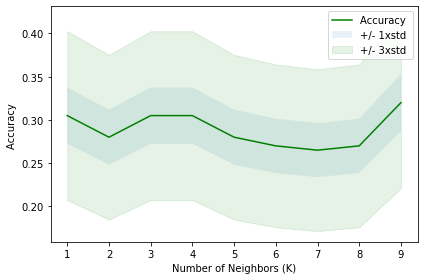

In [171]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [172]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.32 with k= 9
